<p style="font-size:64px; color: #2471A3">introduction</p>

<h2>
Ce projet comprend des techniques pédagogiques d’analyse de la qualité de l’eau à travers un ensemble de données mesurant différents produits chimiques. L’objectif est de développer un modèle capable de prédire avec précision si l’eau est <span style="color:#32CD32	;"><strong>« sûre »</strong></span> ou non en fonction de ces valeurs. Ce type de projet pourrait avoir des applications dans le domaine de la santé privée.
</h2>

<p style="font-size:64px; color: #2471A3">Description des données</p>

Tous les attributs sont des variables numériques et sont listés ci-dessous :

| Composant      | Seuil de danger (supérieur à) | Remarque                       |
|----------------|-------------------------------|--------------------------------|
| Aluminium      | 2.8                           | Dangereux si supérieur         |
| Ammoniac       | 32.5                          | Dangereux si supérieur         |
| Arsenic        | 0.01                          | Dangereux si supérieur         |
| Baryum         | 2                             | Dangereux si supérieur         |
| Cadmium        | 0.005                         | Dangereux si supérieur         |
| Chloramine     | 4                             | Dangereux si supérieur         |
| Chrome         | 0.1                           | Dangereux si supérieur         |
| Cuivre         | 1.3                           | Dangereux si supérieur         |
| Fluorure       | 1.5                           | Dangereux si supérieur         |
| Bactéries      | 0                             | Dangereux si supérieur à 0     |
| Virus          | 0                             | Dangereux si supérieur à 0     |
| Plomb          | 0.015                         | Dangereux si supérieur         |
| Nitrates       | 10                            | Dangereux si supérieur         |
| Nitrites       | 1                             | Dangereux si supérieur         |
| Mercure        | 0.002                         | Dangereux si supérieur         |
| Perchlorate    | 56                            | Dangereux si supérieur         |
| Radium         | 5                             | Dangereux si supérieur         |
| Sélénium       | 0.5                           | Dangereux si supérieur         |
| Argent         | 0.1                           | Dangereux si supérieur         |
| Uranium        | 0.3                           | Dangereux si supérieur         |
| `is_safe`      | -                             | Attribut cible (0 = Non sûr, 1 = Sûr) |


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<p style="font-size:56px; color: #2471A3">importation de donnée et preparation d'envirenment</p>
 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler


: 

In [2]:
df = pd.read_csv('waterQuality1.csv')

# <p style="font-size:56px; color: #2471A3">comprencient des donnée</p>

In [3]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [4]:
df.shape

(7999, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [6]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [7]:
df = df[df["is_safe"] != "#NUM!"]


# <p style="font-size:56px; color: #2471A3">analyse des donnée</p>

Composants qui contribuent le plus à la pollution de l'eau:
cadmium    -0.256034
arsenic    -0.123362
viruses    -0.097040
uranium    -0.075619
nitrates   -0.072100
Name: is_safe, dtype: float64


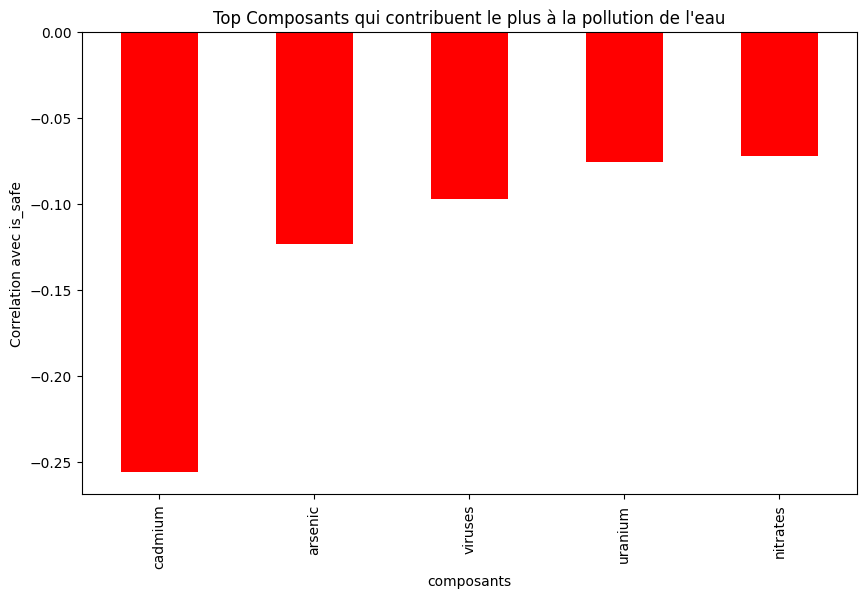

In [8]:
cm = df.corr()
correlation_with_is_safe = cm["is_safe"].sort_values()

print("Composants qui contribuent le plus à la pollution de l'eau:")
print(correlation_with_is_safe.head())

plt.figure(figsize=(10, 6))
correlation_with_is_safe.head().plot(kind='bar', color='red')
plt.title("Top Composants qui contribuent le plus à la pollution de l'eau")
plt.ylabel("Correlation avec is_safe")
plt.xlabel("composants")
plt.show()

## <p style="font-size:32px; color: #58D68D">nombre des échantillons</p>

is_safe
0    7084
1     912
Name: count, dtype: int64


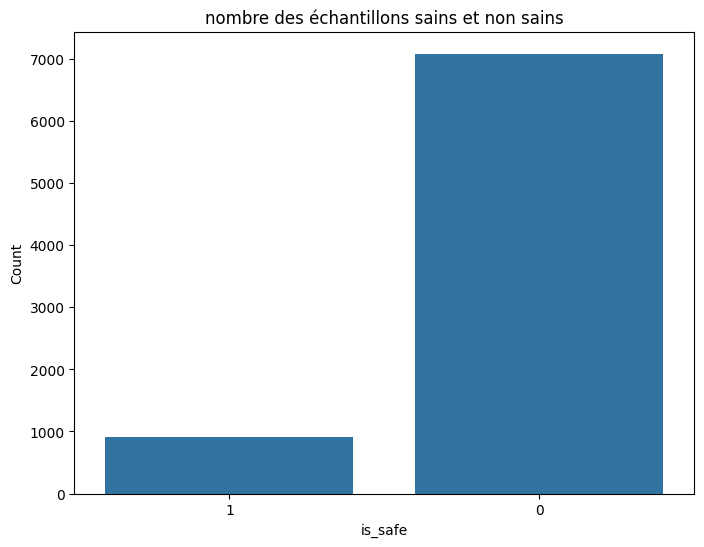

In [9]:
print(df["is_safe"].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='is_safe', data=df)
plt.title('nombre des échantillons sains et non sains')
plt.xlabel('is_safe')
plt.ylabel('Count')
plt.show()


## <p style="font-size:32px; color: #58D68D">les outliers</p>

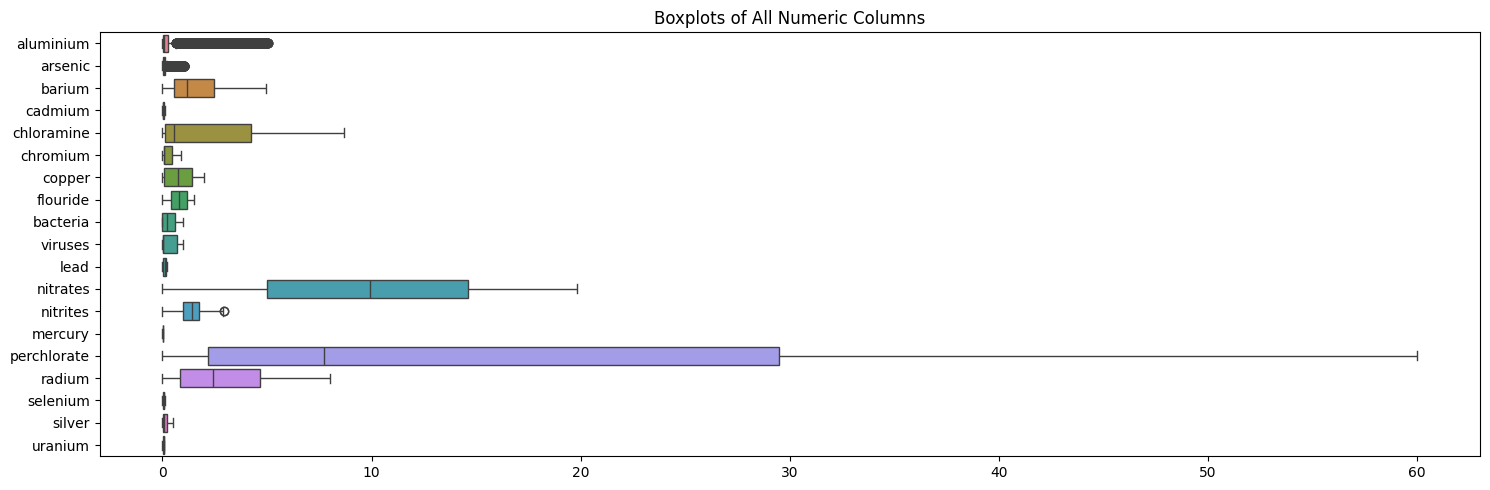

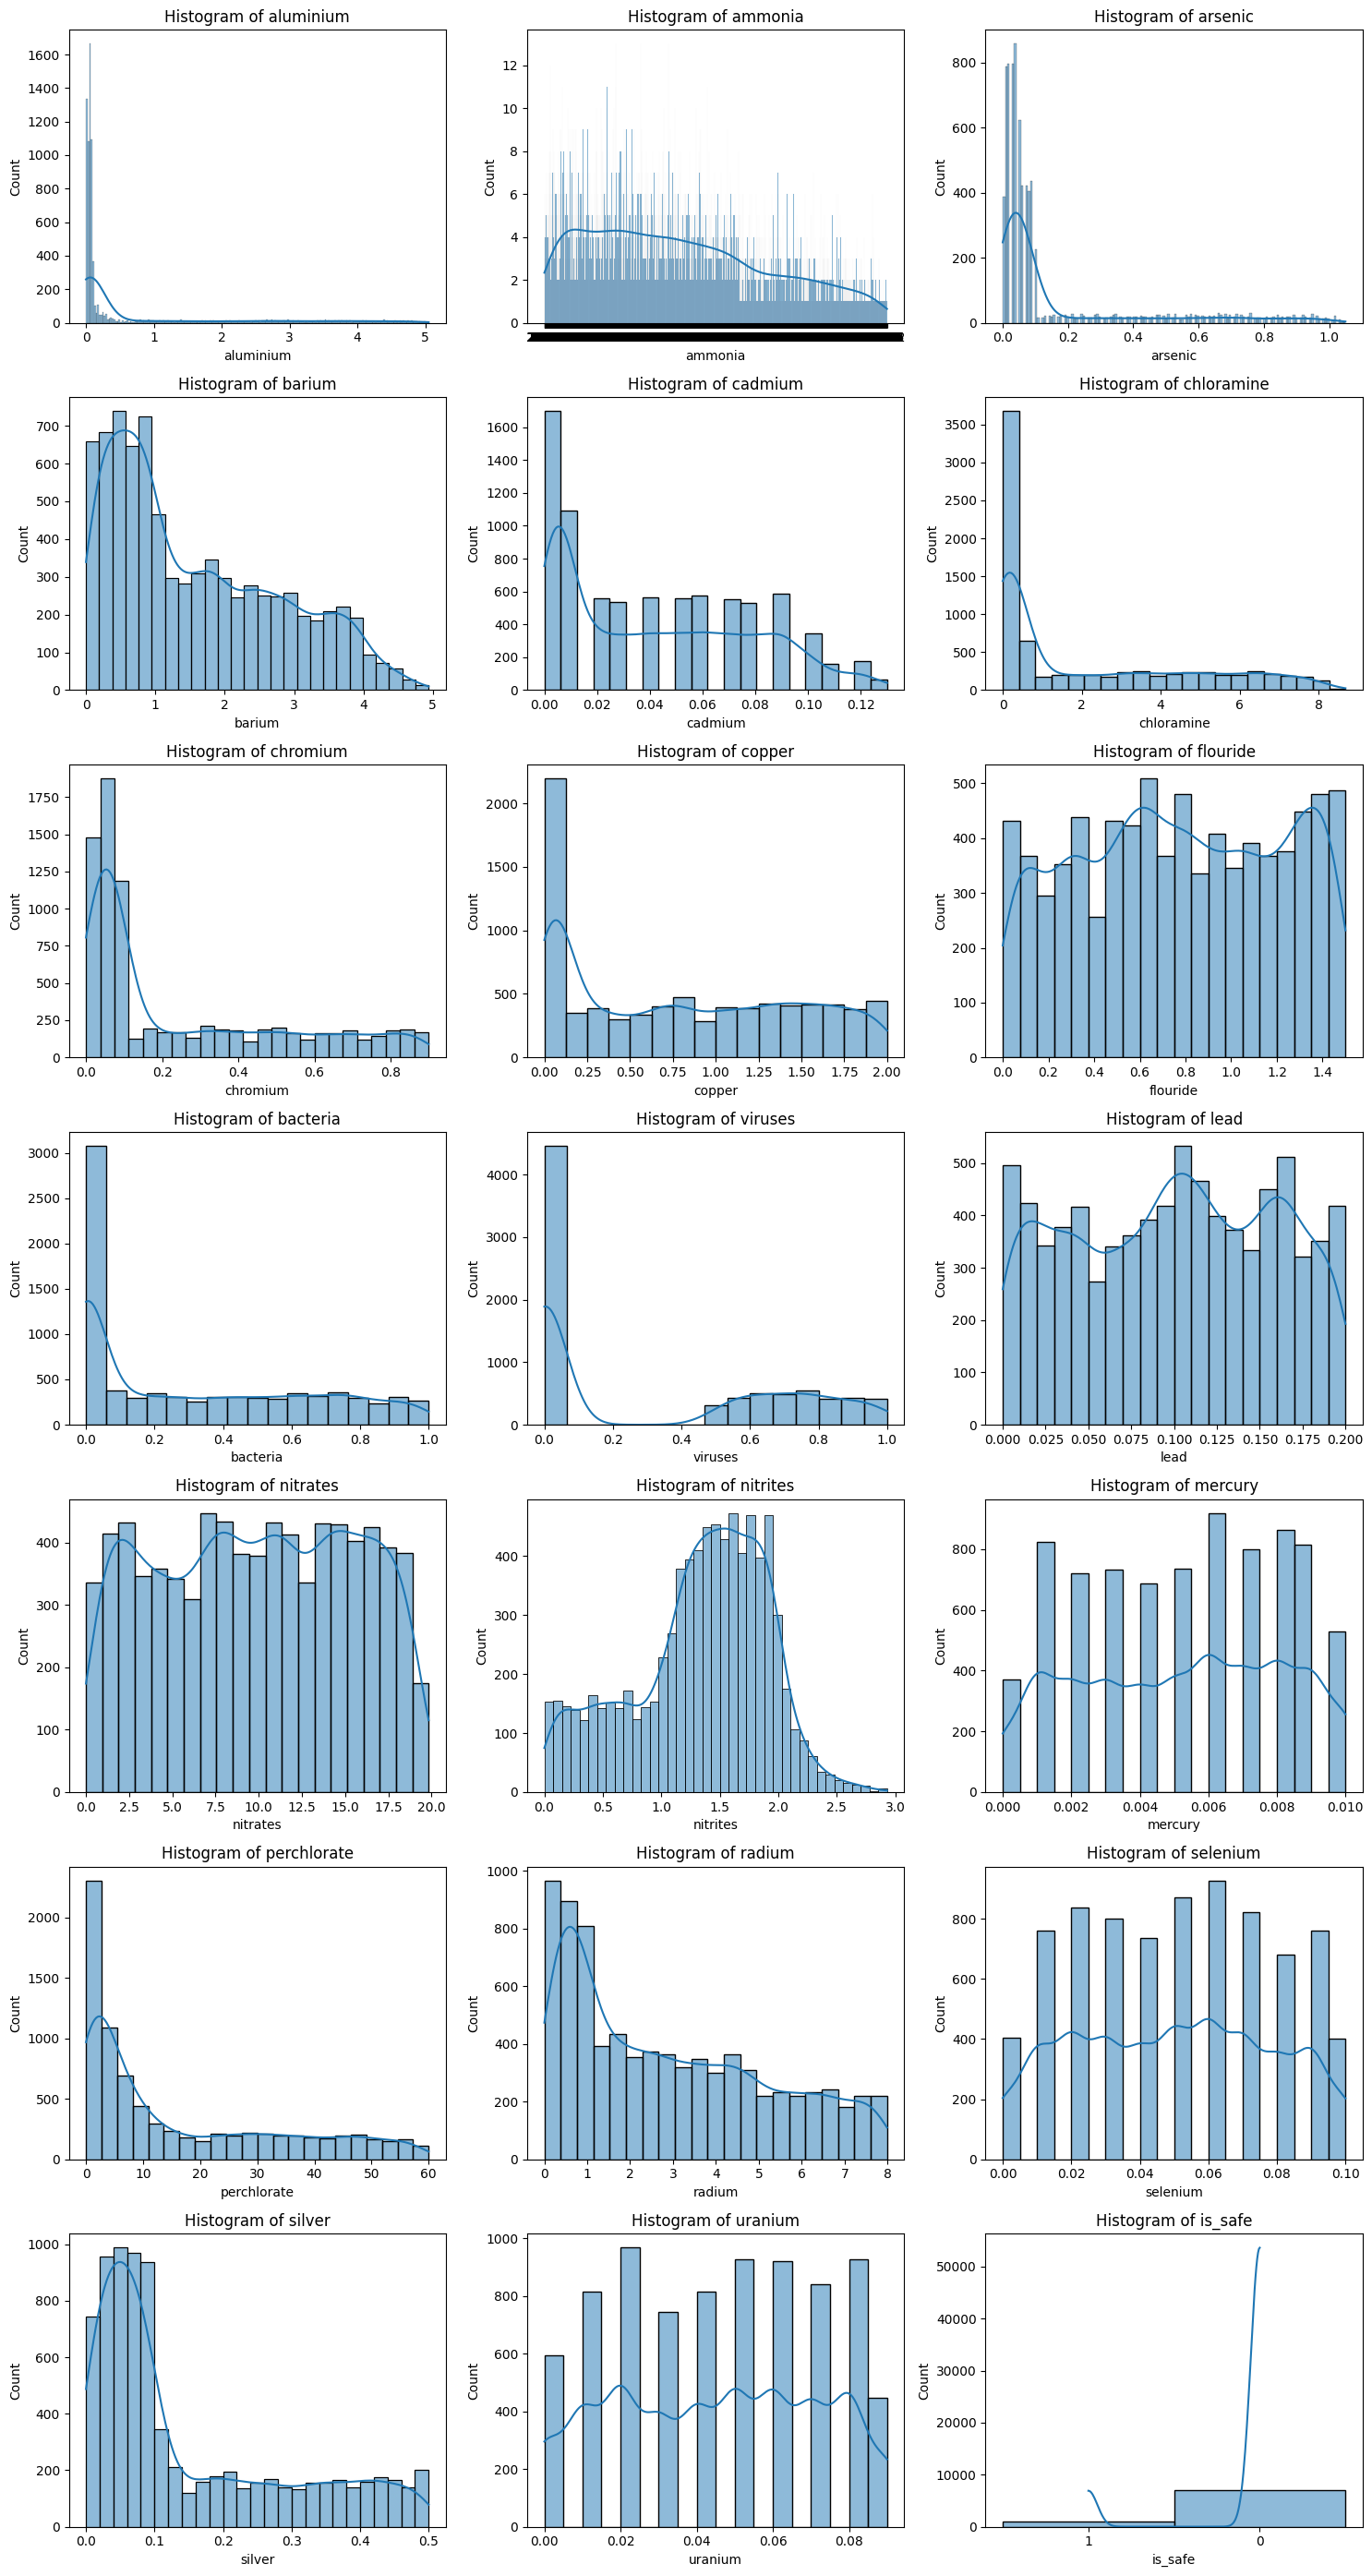

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df.columns 

plt.figure(figsize=(15, 5))
sns.boxplot(data=df[df.columns], orient='h') 
plt.title('Boxplots of All Numeric Columns')
plt.tight_layout()
plt.show()

num_cols = len(df.columns)
cols = 3 
rows = -(-num_cols // cols)  

plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(df.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


## <p style="font-size:32px; color: #58D68D">coloration entre les variables</p>

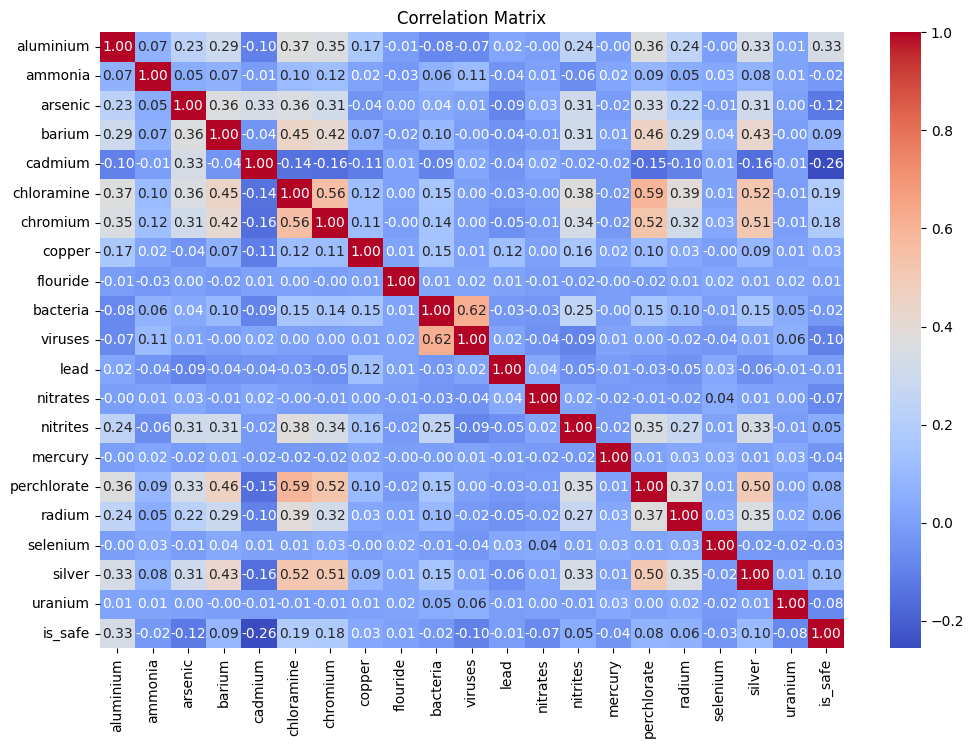

In [11]:
cm = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# <p style="font-size:56px; color: #2471A3">preparation des donnée</p>

## <p style="font-size:32px; color: #58D68D">defenir target</p>

In [12]:
x = df.drop(columns=["is_safe"])
y = df["is_safe"]

In [13]:
x['ammonia'] = pd.to_numeric(x['ammonia'], errors='coerce')

## <p style="font-size:32px; color: #58D68D">deviser les doner en ensemple de test et traning</p>

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# <p style="font-size:56px; color: #2471A3">partie ML</p>

## <p style="font-size:45px; color: #F4D03F">decision tree</p>

In [15]:
dt = DecisionTreeClassifier(random_state=42,max_depth=16)

In [16]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=16, random_state=42)

In [17]:
y_pred_dt = dt.predict(x_test)

In [18]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy: ", dt_accuracy)

Decision Tree Accuracy:  0.961875


In [19]:
classification_report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", classification_report_dt)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1400
           1       0.88      0.81      0.84       200

    accuracy                           0.96      1600
   macro avg       0.92      0.90      0.91      1600
weighted avg       0.96      0.96      0.96      1600



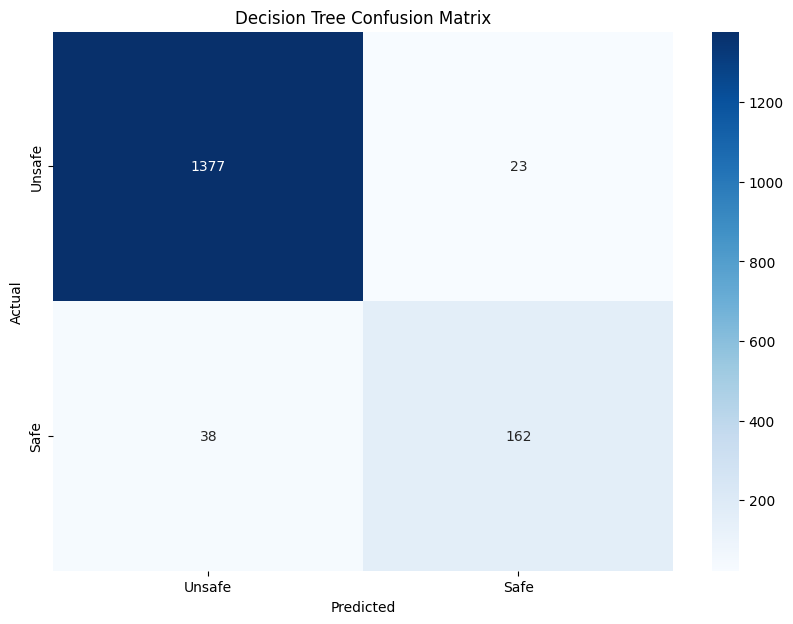

In [20]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unsafe", "Safe"], yticklabels=["Unsafe", "Safe"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

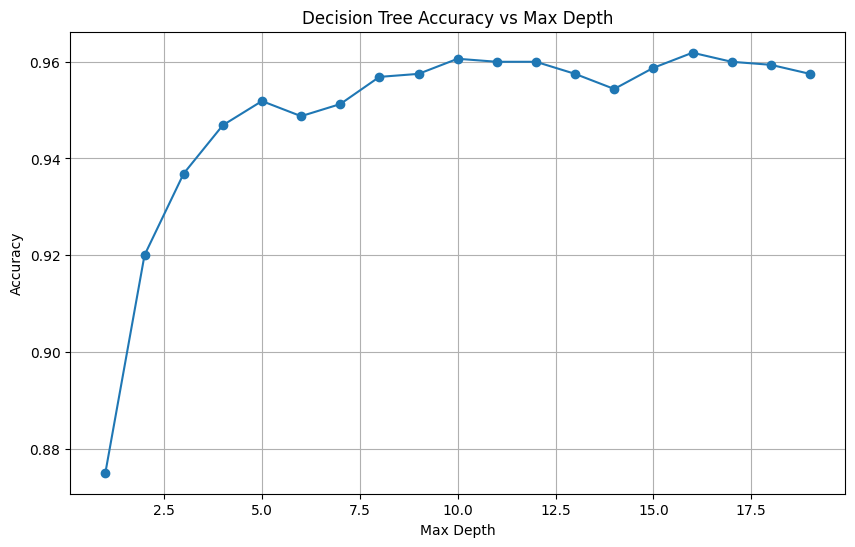

In [21]:
max_depth = np.arange(1, 20)
acc = []
for i in max_depth:
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(max_depth, acc, marker='o')
plt.title("Decision Tree Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


## <p style="font-size:45px; color: #F4D03F">random forest</p>

In [22]:
rf = RandomForestClassifier(n_estimators=185,random_state=42)

In [23]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=185, random_state=42)

In [24]:
y_pred_rf = dt.predict(x_test)

In [25]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Decision Tree Accuracy: ", rf_accuracy)

Decision Tree Accuracy:  0.9575


In [26]:
classification_report_rf = classification_report(y_test, y_pred_rf)
print("Decision Tree Classification Report:\n", classification_report_rf)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1400
           1       0.85      0.80      0.82       200

    accuracy                           0.96      1600
   macro avg       0.91      0.89      0.90      1600
weighted avg       0.96      0.96      0.96      1600



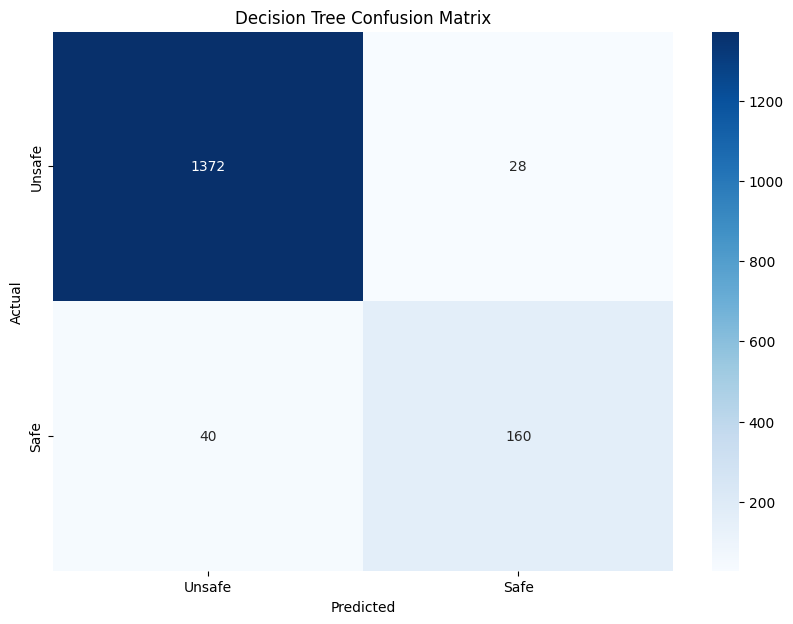

In [27]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unsafe", "Safe"], yticklabels=["Unsafe", "Safe"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [ ]:
n_estimators = np.arange(1, 200)
acc = []
for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, acc, marker='o')
plt.title("Random Forest Accuracy vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

## <p style="font-size:45px; color: #F4D03F">knn</p>

In [28]:
knn = KNeighborsClassifier(n_neighbors=9)

In [29]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [30]:
y_pred_knn = knn.predict(x_test)

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\pc\

In [31]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("knn Accuracy: ", knn_accuracy)

knn Accuracy:  0.8725


In [32]:
classification_report_knn = classification_report(y_test, y_pred_knn)
print("knn Classification Report:\n", classification_report_knn)

knn Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1400
           1       0.43      0.07      0.11       200

    accuracy                           0.87      1600
   macro avg       0.66      0.53      0.52      1600
weighted avg       0.82      0.87      0.83      1600



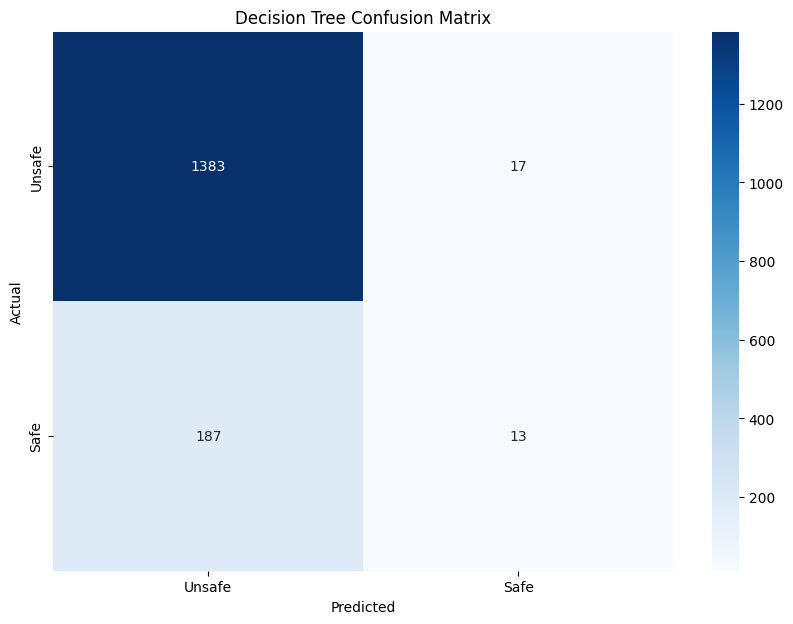

In [33]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unsafe", "Safe"], yticklabels=["Unsafe", "Safe"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

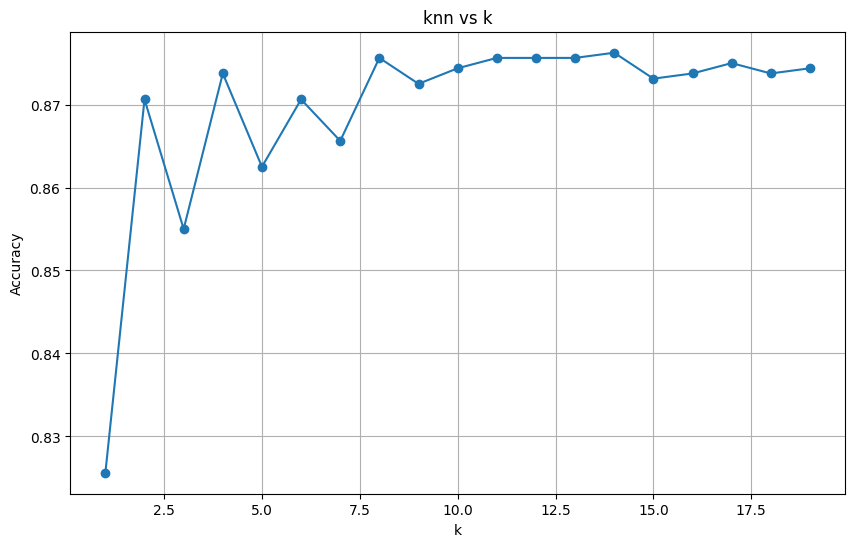

In [34]:
k = np.arange(1, 21)
acc = []
for i in max_depth:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(max_depth, acc, marker='o')
plt.title("knn vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


## <p style="font-size:45px; color: #F4D03F">logistique regresion</p>

In [35]:
log = LogisticRegression()

In [36]:
log.fit(x_train, y_train)

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred_log = log.predict(x_test)

In [38]:
log_accuracy = accuracy_score(y_test, y_pred_log)
print("logistique regresion Accuracy: ", log_accuracy)

logistique regresion Accuracy:  0.895


In [39]:
classification_report_log = classification_report(y_test, y_pred_log)
print("logistique regresion Classification Report:\n", classification_report_log)

logistique regresion Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1400
           1       0.73      0.26      0.38       200

    accuracy                           0.90      1600
   macro avg       0.82      0.62      0.66      1600
weighted avg       0.88      0.90      0.87      1600



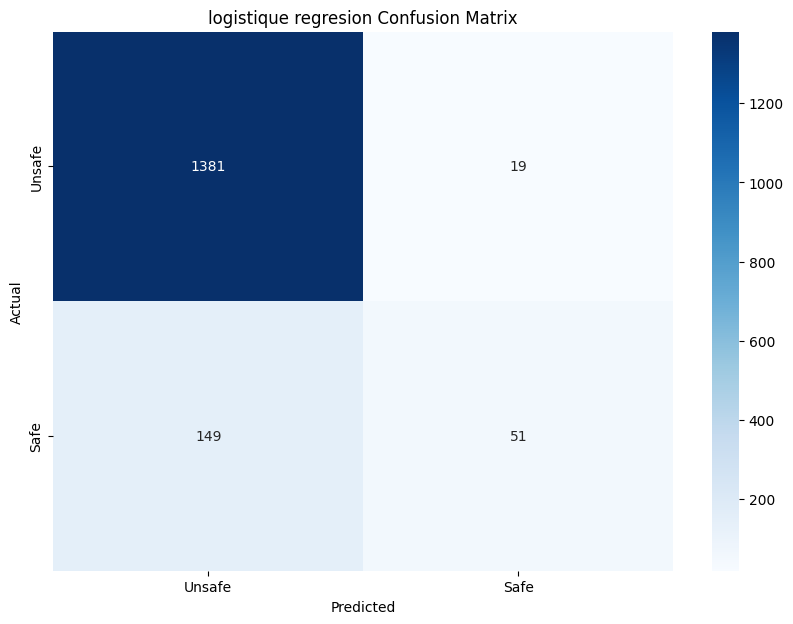

In [40]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unsafe", "Safe"], yticklabels=["Unsafe", "Safe"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("logistique regresion Confusion Matrix")
plt.show()

## <p style="font-size:45px; color: #F4D03F">SVM</p>

In [41]:
svm = SVC(kernel='linear', C=1.0, random_state=42)

In [42]:
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [43]:
y_pred_svm = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

In [44]:
print("SVM Accuracy: ", svm_accuracy)
classification_report_svm = classification_report(y_test, y_pred_svm)   
print("SVM Classification Report:\n", classification_report_svm)

SVM Accuracy:  0.89875
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1400
           1       0.77      0.27      0.40       200

    accuracy                           0.90      1600
   macro avg       0.84      0.63      0.67      1600
weighted avg       0.89      0.90      0.88      1600



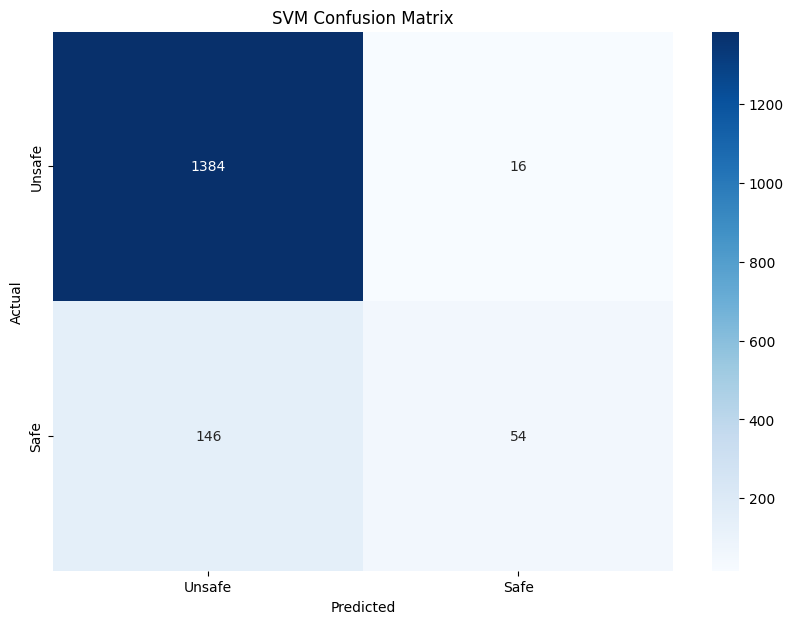

In [45]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unsafe", "Safe"], yticklabels=["Unsafe", "Safe"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

<p style="font-size:64px; color: #2471A3">conclusion</p>

<h2>
Le projet avait pour objectif de prédire si une eau est potable ou non à partir de plusieurs paramètres chimiques. Après avoir exploré et analysé les données, nous avons constaté que certaines variables comme les nitrates, le mercure, le plomb ou encore le niveau de bactéries influencent fortement la qualité de l’eau.

Malgré un déséquilibre des classes dans les données (plus d’exemples d’eau sûre que dangereuse), le modèle **Random Forest** a montré des performances solides avec une bonne précision. Il a su détecter efficacement les cas à risque sans trop de faux positifs.

Ce modèle peut donc être un bon outil d’aide à la décision pour la surveillance de la qualité de l’eau, à condition de continuer à l'améliorer avec plus de données réelles et équilibrées.
</h2>

In [ ]:
import pickle

# نفترض أن X_train هو DataFrame ديالك (بدون y)
feature_order = x_train.columns.tolist()

with open("feature_order.pkl", "wb") as f:
    pickle.dump(feature_order, f)

In [47]:
import pickle

with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)
